In [2]:
import pandas as pd

df = pd.read_csv('exercise_dataset.csv')
df.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


## Selección de la técnica

La técnica seleccionada para abordar el problema es la **visualización y el análisis exploratorio de datos**. Esta elección se debe a que el objetivo principal es analizar la distribución de las variables, detectar patrones, identificar posibles errores en los datos y comprender las relaciones entre las métricas de ejercicio y salud, sin necesidad de predecir un valor concreto.

In [7]:
df.dtypes

,0
ID,int64
Exercise,object
Calories Burn,float64
Dream Weight,float64
Actual Weight,float64
Age,int64
Gender,object
Duration,int64
Heart Rate,int64
BMI,float64


## Clasificación de variables

Las variables del dataset pueden clasificarse en:

- **Variables cuantitativas**: aquellas representadas por valores numéricos, como weather conditions, gender o exercise.
- **Variables cualitativas**: aquellas que representan categorías, como exercise intensity, BMI, heart rate, duration, age, actual weight, dream weight, calories burn o ID.

In [9]:
df.nunique()

,0
ID,3864
Exercise,10
Calories Burn,3864
Dream Weight,3864
Actual Weight,3864
Age,43
Gender,2
Duration,41
Heart Rate,81
BMI,3864


El análisis de valores únicos permite identificar variables categóricas con muchas categorías distintas, lo que puede dificultar su tratamiento en modelos de machine learning y requerir técnicas de preprocesamiento como la agrupación de categorías o la codificación adecuada.

In [10]:
df.isnull().sum()

,0
ID,0
Exercise,0
Calories Burn,0
Dream Weight,0
Actual Weight,0
Age,0
Gender,0
Duration,0
Heart Rate,0
BMI,0


In [11]:
df.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


A partir del análisis exploratorio no se observan valores nulos significativos. No obstante, podrían existir errores como valores atípicos, escalas inconsistentes o variables redundantes que deberán tenerse en cuenta en fases posteriores del análisis.

In [12]:
# Medidas de tendencia central
df.mean(numeric_only=True)

,0
ID,1932.500000
Calories Burn,301.861806
Dream Weight,75.139263
Actual Weight,75.188440
Age,39.621118
Duration,40.190994
Heart Rate,139.777950
BMI,26.801977
Exercise Intensity,5.457298


In [13]:
df.median(numeric_only=True)

,0
ID,1932.500000
Calories Burn,299.742508
Dream Weight,75.522136
Actual Weight,75.544407
Age,40.000000
Duration,40.000000
Heart Rate,140.000000
BMI,26.861656
Exercise Intensity,5.000000


In [14]:
df.mode(numeric_only=True)

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
0,1,100.009403,50.001984,45.783747,59.0,43.0,103.0,18.500014,7.0
1,2,100.014712,50.024630,46.011826,NaN,NaN,152.0,18.500941,NaN
2,3,100.031027,50.038781,46.158512,NaN,NaN,NaN,18.506064,NaN
3,4,100.335105,50.041738,46.390488,NaN,NaN,NaN,18.507358,NaN
4,5,100.640541,50.061249,46.441858,NaN,NaN,NaN,18.515636,NaN
...,...,...,...,...,...,...,...,...,...
3859,3860,499.138425,99.897515,103.916291,NaN,NaN,NaN,34.987444,NaN
3860,3861,499.244532,99.916769,103.972289,NaN,NaN,NaN,34.993114,NaN
3861,3862,499.381084,99.924465,104.106472,NaN,NaN,NaN,34.995478,NaN
3862,3863,499.469389,99.983694,104.181354,NaN,NaN,NaN,34.995733,NaN


## Medidas de tendencia central

Se han calculado la media, la mediana y la moda para las variables cuantitativas del dataset. Estas medidas permiten identificar el valor central o típico de cada variable y facilitan la comprensión del comportamiento general de los datos.

In [15]:
# Estadísticos descriptivos generales
df.describe()

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


In [16]:
# Rango intercuartílico (IQR)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
IQR

,0
ID,1931.500000
Calories Burn,201.974851
Dream Weight,25.334404
Actual Weight,25.628860
Age,22.000000
Duration,21.000000
Heart Rate,41.000000
BMI,8.263605
Exercise Intensity,5.000000


## Medidas de dispersión

Las medidas de dispersión permiten analizar la variabilidad de los datos. En este análisis se han considerado el rango, la desviación estándar y el rango intercuartílico (IQR), lo que ayuda a detectar posibles valores atípicos y evaluar la dispersión de las variables cuantitativas.

In [17]:
# Percentiles
df.quantile([0.25, 0.5, 0.75], numeric_only=True)

,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
0.25,966.75,202.168837,62.373585,62.476906,29.0,30.0,119.0,22.686774,3.0
0.50,1932.50,299.742508,75.522136,75.544407,40.0,40.0,140.0,26.861656,5.0
0.75,2898.25,404.143688,87.707989,88.105767,51.0,51.0,160.0,30.950380,8.0


## Medidas de posición

El cálculo de percentiles y cuartiles permite conocer la posición relativa de los datos dentro de la distribución, facilitando la identificación de concentraciones de valores y posibles extremos.

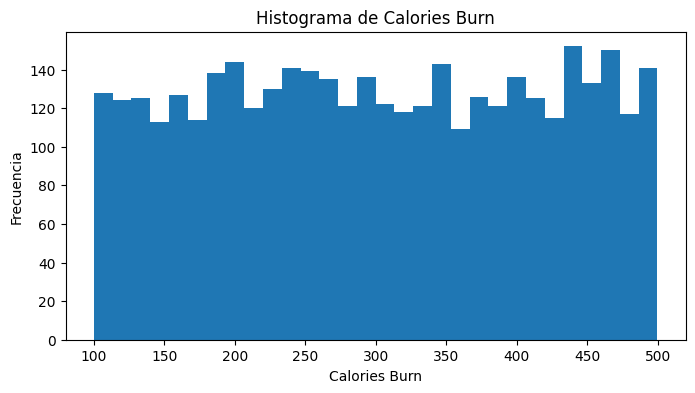

In [19]:
import matplotlib.pyplot as plt

col = "Calories Burn"
x = df[col].dropna()

plt.figure(figsize=(8,4))
plt.hist(x, bins=30)
plt.title(f"Histograma de {col}")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.show()

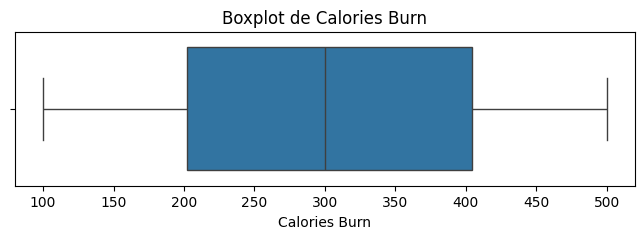

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

col = "Calories Burn" # Corrected from "Calories_Burn"
x = df[col].dropna()

plt.figure(figsize=(8,2))
sns.boxplot(x=x)
plt.title(f"Boxplot de {col}")
plt.xlabel(col)
plt.show()

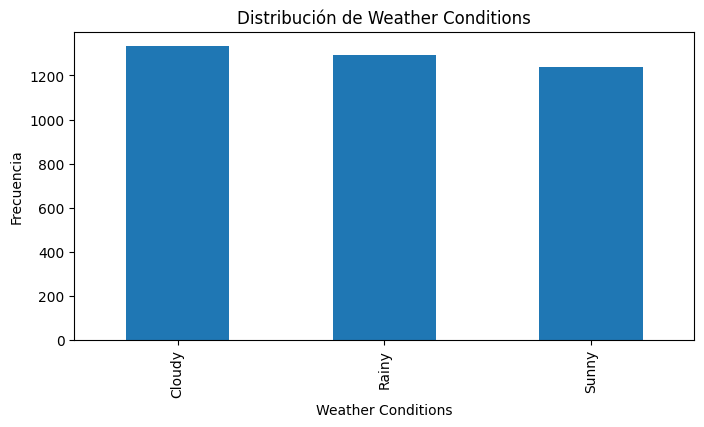

In [25]:
import matplotlib.pyplot as plt

col = "Weather Conditions"

df[col].value_counts().plot(kind='bar', figsize=(8,4))
plt.title(f"Distribución de {col}")
plt.xlabel(col)
plt.ylabel("Frecuencia")
plt.show()

## Representación gráfica de los datos

Para complementar el análisis descriptivo, se han generado distintas representaciones gráficas con el objetivo de visualizar la distribución de las variables, identificar posibles valores atípicos y analizar la frecuencia de las variables categóricas.

En primer lugar, se ha representado un **histograma de una variable numérica**, lo que permite observar la forma de su distribución, detectar concentraciones de valores y posibles asimetrías. Este tipo de gráfico resulta especialmente útil para comprender el comportamiento general de variables continuas.

A continuación, se ha generado un **boxplot de la misma variable numérica**, que facilita la detección de valores atípicos mediante el análisis del rango intercuartílico y los valores extremos. Este gráfico es especialmente relevante para identificar posibles outliers que podrían afectar a futuros modelos de análisis.

Por último, se ha realizado un **gráfico de barras de una variable categórica**, el cual permite visualizar la frecuencia de aparición de cada categoría dentro del dataset. Este tipo de representación es útil para identificar las categorías predominantes y comprender la distribución de las variables cualitativas.